# 1.2 Image Preprocessing

You need to write a python function that loads images and preprocesses them as descibed below.
Note that this function will have to mangle the filenames accordingly to find the desired pairs.
The images are of size 576 × 576. Resize the images to a size of 32 × 32.

> First of all, I have imported the imported libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


> Then, I made a preparation function that does the following:
1. go through images in the destination folder.
2. resize all images into 32 X 32 size.
3. label the images
4. returns both of a flattened df for further traning, and an array of images.

In [2]:

def preparation(folder_name):
    '''
    folder_name : folder where images are placed.
    returns     : prepared flatten df and a prepared array of images.
    
    '''
    
    import os
    import skimage.io as skio
    from skimage.transform import resize
    import numpy as np
    import pandas as pd
    location = r'/home/khadija/Downloads/A2/'+folder_name
    folders=['canvas1', 'cushion1', 'linsseeds1', 'sand1', 'seat2' , 'stone1']
    X_df=[]
    X=[]
    y=[]
    for ind,it in enumerate(folders):

        for file in os.listdir(location+"/"+it):
            f_img = location+"/"+it+"/"+file

            img = skio.imread(f_img)
            img = resize(img,(32,32))
            X.append(img)

            X_df.append(img.flatten())
            y.append(folders[ind])
            
    X=np.array(X)        
    X_df=np.array(X_df)
    y=np.array(y)
    df=pd.DataFrame(X_df)
    df['labels']=y
    return X,df
    
    

> I have called the preparation function passing to it both of training and testing images.

In [3]:
X_train,df_train=preparation('training')
X_test,df_test=preparation('testing')


> We make sure that the images have a size of 32 X 32

In [4]:
X_train[0].shape

(32, 32)

In [5]:
X_test[0].shape

(32, 32)

> The shape of the training and testing splits is as mentioned in the pdf.

In [6]:
len(X_train)

180

In [7]:
len(X_test)

60

# 1.3 Image Matching

Write a function matchingImages that accepts two of the images and calculates a score based
on the similarity of the two images using either cross-correlation, convolution or sum of squared
differences. Do not use any skimage function for this part. Your function should have the follow-
ing list of parameters: ( imageA, imageB, method=cc|conv|ssd, normalize=y|n) where the
1optional argument method selects cross-correlation (cc), convolution (conv) or sum of squared
differences (ssd). The method should default to non-normalized cross-correlation.
Given the similarity score, perform a simple comparison of two images using a threshold to
decide if two images show the same texture. Build a simple classifier based on this score which
returns true if two images match, i.e., the images pass the threshold. Evaluate
your classifier with
P N
−1
−1)
=
pairs chosen from the images in the training data set. There are a total of i=1
i = (N )(N
2
(160)(159)
= 12, 720 pairs in the training data set but most of the pairs will show different textures.
2
Use a suitable fraction of the pairs for this validation step. Note your image matching approach
will have no training step.

> We have made a matching function tat detects similarities between images by setting up a threshold.
The function does the following:
1. Find the similarity between images using correlation comparison, convolution and sum of squares difference.

2. returns a similarity list between the pair on images.

In [8]:

def matchingImages(paired_images, method="cc", normalize="n"):
    '''
    paired_images : a tuble of 2 images at least.
    method        : the method for matching, the possible values are cc, ssd and conv
    normalize     : A boolean parameter for normalization transformation.
    returns       : a similarity list of matching.
    
    '''
    import numpy as np
    cc=[]
    norm_cc=[]

    conv=[]
    norm_conv=[]

    ssd=[]
    norm_ssd=[]

    
    for i in range(len(paired_images)):

        cc.append((paired_img[i][0] @ paired_img[i][1]).sum())
        
        norm_cc.append(((paired_img[i][0]-np.mean(paired_img[i][0]))/np.std(paired_img[i][0]))
                      @((paired_img[i][1]-np.mean(paired_img[i][1]))/np.std(paired_img[i][1])))      

        conv_t=  np.flip(paired_img[i][0],0)
        conv_tt= np.flip(conv_t,1)
        conv.append((conv_tt@ paired_img[i][1]).sum())
        norm_conv.append(((paired_img[i][0]-np.mean(paired_img[i][0]))/np.std(paired_img[i][0]))
                      @((paired_img[i][1]-np.mean(paired_img[i][1]))/np.std(paired_img[i][1])))
        ssd_t=np.subtract(paired_img[i][0] ,paired_img[i][1])
        ssd.append(np.square(ssd_t).sum())
        norm_ssd.append((paired_img[i][0]-np.mean(paired_img[i][0]))
                      @(paired_img[i][1]-np.mean(paired_img[i][1])))


    
    return cc

    if method=="cc" & normalize=="y":
        return cc
    elif method=="conv" & normalize=="n":
        return conv
    elif method=="conv" & normalize=="y":
        return norm_conv
    elif method=="ssd" & normalize=="n":
        return ssd
    elif method=="ssd" & normalize=="y":
        return norm_ssd
    else:
        print("Please enter a suitable method from [ssd,conv,cc]")
    
    
    

> We use the combination tool to get non-repeated pairs of images.

In [9]:
import itertools
paired_img = list(itertools.combinations(X_train, 2))



> We got a pair of image in which each image has a size of 32 X 32.

In [10]:
paired_img[0][0].shape

(32, 32)

In [11]:
len(paired_img[0])

2

In [12]:
len(paired_img)

16110

Run the function with the default parameters

In [13]:


import time

start_ = time.time()

cc=matchingImages(paired_img)


end_ = time.time()
print(f"Runtime of the matching function is {end_ - start_}")


Runtime of the matching function is 6.442701816558838


> Detect similarities based on a threshold of the similarity method result median. 

In [14]:
label_cc=[]
#label data
for i,it in enumerate(cc): 
    if cc[i]>np.median(cc):
        label_cc.append(1)
    else:
        label_cc.append(0)
        
        


In [15]:
label_cc

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,


In [16]:
# prepare test data

import time

start_test = time.time()

paired_img_test = list(itertools.combinations(X_test, 2))
cc_test=matchingImages(paired_img_test)

end_test = time.time()
print(f"Runtime of the matching function is {end_test - start_test}")


Runtime of the matching function is 0.7018375396728516


In [17]:
label_cc_test=[]
#label data
for i,it in enumerate(cc_test): 
    if cc_test[i]>np.median(cc_test):
        label_cc_test.append(1)
    else:
        label_cc_test.append(0)
        

In [18]:
label_cc_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,


# 1.4 Perceptron

Build a multilayer perceptron model (similar to the MNIST example shown in class) to classify
an image pair as showing the same texture or different textures. Note that this is a binary
classification. You will need to feed in pairs of images by concatenating them into your network.
The simplest approach is to concatenate the pair of images ending up with two channels, i.e.,an
image of size 32 × 32 × 2 which then have to convert into a vector of size 2048. For this part
of the assignment, you must build and train the Multi-layer perceptron model with scikit-learn,
or alternatively with the Keras API of tensorflow. It may be useful to balance the dataset by
sub-sampling the negative (i.e., different) class. Use the same validation set as in Section 1.3 to
monitor the training of your classifier.

In [19]:
# flattened data
df_train.iloc[:,:-1]

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.505882,0.457843,0.474510,0.428431,0.476471,0.529412,0.523529,0.561765,0.525490,0.475490,...,0.447059,0.456863,0.511765,0.465686,0.454902,0.447059,0.455882,0.490196,0.511765,0.543137
1,0.501961,0.530392,0.530392,0.494118,0.486275,0.538235,0.510784,0.500980,0.523529,0.444118,...,0.469608,0.458824,0.498039,0.460784,0.527451,0.479412,0.464706,0.523529,0.474510,0.490196
2,0.496078,0.501961,0.452941,0.445098,0.453922,0.473529,0.503922,0.460784,0.486275,0.525490,...,0.434314,0.441176,0.442157,0.474510,0.458824,0.450980,0.450980,0.471569,0.498039,0.466667
3,0.449020,0.435294,0.450000,0.473529,0.452941,0.468627,0.505882,0.508824,0.543137,0.552941,...,0.535294,0.516667,0.548039,0.547059,0.554902,0.537255,0.534314,0.520588,0.474510,0.437255
4,0.472549,0.529412,0.517647,0.452941,0.509804,0.484314,0.454902,0.521569,0.549020,0.495098,...,0.482353,0.507843,0.557843,0.545098,0.488235,0.505882,0.562745,0.538235,0.484314,0.482353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.552941,0.568627,0.441176,0.297059,0.452941,0.484314,0.457843,0.535294,0.566667,0.560784,...,0.473529,0.518627,0.513725,0.423529,0.488235,0.390196,0.401961,0.423529,0.374510,0.482353
176,0.353922,0.388235,0.494118,0.520588,0.528431,0.569608,0.562745,0.513725,0.519608,0.572549,...,0.517647,0.569608,0.595098,0.533333,0.517647,0.586275,0.515686,0.506863,0.519608,0.436275
177,0.324510,0.519608,0.529412,0.430392,0.410784,0.433333,0.529412,0.555882,0.503922,0.472549,...,0.458824,0.568627,0.379412,0.349020,0.519608,0.538235,0.429412,0.558824,0.532353,0.458824
178,0.400000,0.522549,0.549020,0.550980,0.490196,0.392157,0.405882,0.448039,0.543137,0.588235,...,0.549020,0.460784,0.350000,0.464706,0.494118,0.376471,0.545098,0.584314,0.556863,0.480392


In [20]:
# flattened data
mlp_train=df_train.iloc[:,:-1].to_numpy()
mlp_test=df_test.iloc[:,:-1].to_numpy()

In [21]:
mlp_train_com=list(itertools.combinations(mlp_train, 2))
mlp_test_com=list(itertools.combinations(mlp_test, 2))

In [22]:
X_train

array([[[0.50588235, 0.45784314, 0.4745098 , ..., 0.51470588,
         0.49509804, 0.50392157],
        [0.49411765, 0.45294118, 0.45196078, ..., 0.5       ,
         0.52254902, 0.52941176],
        [0.45098039, 0.42352941, 0.43529412, ..., 0.4745098 ,
         0.51960784, 0.54803922],
        ...,
        [0.47843137, 0.44509804, 0.43137255, ..., 0.46176471,
         0.49607843, 0.51176471],
        [0.48235294, 0.4372549 , 0.43627451, ..., 0.46470588,
         0.50098039, 0.54313725],
        [0.50490196, 0.48823529, 0.47941176, ..., 0.49019608,
         0.51176471, 0.54313725]],

       [[0.50196078, 0.53039216, 0.53039216, ..., 0.49705882,
         0.55686275, 0.5254902 ],
        [0.53333333, 0.51176471, 0.53431373, ..., 0.45882353,
         0.54803922, 0.53529412],
        [0.52941176, 0.46862745, 0.45098039, ..., 0.46666667,
         0.53039216, 0.54215686],
        ...,
        [0.44803922, 0.40196078, 0.43529412, ..., 0.4872549 ,
         0.43039216, 0.48529412],
        [0.4

In [23]:
len(mlp_train_com)

16110

In [24]:
len(mlp_train_com[0])

2

In [25]:
len(mlp_train_com[0][0])

1024

In [26]:
# combine the 2 images into one array
Tr=[]
for i in range(len(mlp_train_com)):
    Tr.append(np.concatenate( mlp_train_com[i], axis=0 ))
Ts=[]
for i in range(len(mlp_test_com)):
    Ts.append(np.concatenate( mlp_test_com[i], axis=0 ))
    

In [27]:
len(Tr[0])

2048

> apply a MLP algorithm

In [28]:
import time

start = time.time()

from sklearn.neural_network import MLPClassifier
y_train=np.array(label_cc_test)

y_test=np.array(label_cc_test)
mlp = MLPClassifier(random_state=1, max_iter=300).fit(Tr, label_cc)


end = time.time()


print(f"Runtime of the MLP is {end - start}")



Runtime of the MLP is 175.31617999076843


> It took 300 seconds which are around 5 minutes to fit a MLP algorithm.

In [29]:
from sklearn.metrics import accuracy_score

start_MLP = time.time()

prediction = mlp.predict(Ts)

end_MLP = time.time()


print(f" Prediction Runtime of the MLP is {end_MLP - start_MLP}")
 
accuracy_score(label_cc_test,prediction)


 Prediction Runtime of the MLP is 0.07028841972351074


0.5101694915254237

# 1.5 Classification Comparison

Compare the classifier of Sections 1.3 and 1.4 on the test data subset. Consider classifier perfor-
mance but also other criteria, e.g., training effort, prediction speed, generalization and robustness.
Your brief discussion based on quantifiable criteria need to be contained in your Jupyter notebook.

Training Time Complexity

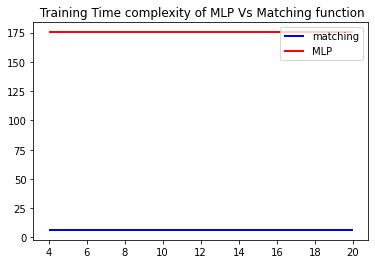

In [30]:
fig, ax = plt.subplots()
ax.hlines(y=end_-start_, xmin=4, xmax=20, linewidth=2, color='b')
ax.hlines(y=end-start, xmin=4, xmax=20, linewidth=2, color='r')
plt.legend(['matching','MLP'])
plt.title(' Training Time complexity of MLP Vs Matching function')

plt.show()

> > It's seen that the matching function takes much time that the MLP takes in the modeling.

Prediction Time Complexity

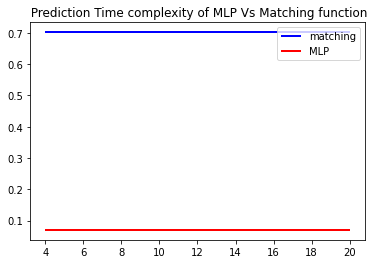

In [31]:

fig, ax = plt.subplots()
ax.hlines(y=end_test - start_test, xmin=4, xmax=20, linewidth=2, color='b')
ax.hlines(y=end_MLP - start_MLP, xmin=4, xmax=20, linewidth=2, color='r')
plt.legend(['matching','MLP'])
plt.title(' Prediction Time complexity of MLP Vs Matching function')

plt.show()

> It's seen that the matching function takes much time that the MLP takes in the prediction

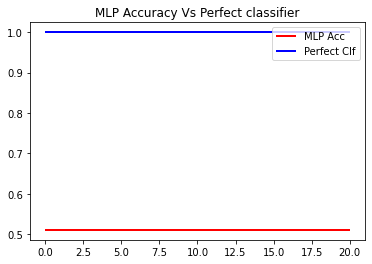

In [32]:
fig, ax = plt.subplots()
ax.hlines(y=accuracy_score(label_cc_test,prediction), xmin=0, xmax=20, linewidth=2, color='r')
ax.hlines(y=1, xmin=0, xmax=20, linewidth=2, color='b')

plt.legend(['MLP Acc','Perfect Clf'])
plt.title('MLP Accuracy Vs Perfect classifier')

plt.show()

> The MLP performance is fair with accuracy of 50 %

Summary 
- MLP took too much time to train, in addition to the performace is fair, which has a 50% accuracy .
- the matching function took much time and effort to predict, but faster than the MLP in the training. However it's not rule-based solution that cannot summurize data and find pattern.
- MLP needs some edit on the parameters that can lead to an improvement in the accuracy.



# 1.6 Feature Engineering

Considering the results for Sections 1.3 and 1.4 design an improved classifier that uses a multilayer
perceptron for classification but first uses some form of feature extraction from an image pair. Hint:
Have a look ar skimage.feature and skimage.filter. In general, you are allowed any skimage
function for this part. For this part, you are not allowd more than 32 features as input to the
MLP. Use the same validation set as in Section 1.3 to monitor the training of your classifier.

By equalizing histograms

In [33]:
from skimage import exposure

Tr_exposured = exposure.equalize_hist(np.array(Tr))
Ts_exposured = exposure.equalize_hist(np.array(Ts))
mlp = MLPClassifier(random_state=1, max_iter=300).fit(Tr_exposured, label_cc)

prediction_exposure = mlp.predict(Ts_exposured)

accuracy_score(label_cc_test,prediction_exposure)

0.5073446327683616

In [34]:
from skimage.exposure import adjust_gamma
Tr_gamma=adjust_gamma(np.array(Tr), gamma=2, gain=1.0)
Ts_gamma=adjust_gamma(np.array(Ts), gamma=2, gain=1.0)
mlp = MLPClassifier(random_state=1, max_iter=300).fit(Tr_gamma, label_cc)

prediction_gamma = mlp.predict(Ts_gamma)

accuracy_score(label_cc_test,prediction_gamma)

0.5175141242937853

> The accuracy has improved slightly.

By Canny Filter

In [35]:
from skimage import feature


Tr_canny = feature.canny(np.array(Tr))
Ts_canny = feature.canny(np.array(Ts))
mlp = MLPClassifier(random_state=1, max_iter=300).fit(Tr_canny, label_cc)

prediction_canny = mlp.predict(Ts_canny)

accuracy_score(label_cc_test,prediction_canny)

0.5033898305084745

# 1.7 Discussion on Feature Engineering

Briefly discuss why you expect your approach to improve the classification results and use the test
data to show that your method is successful.

Comparison

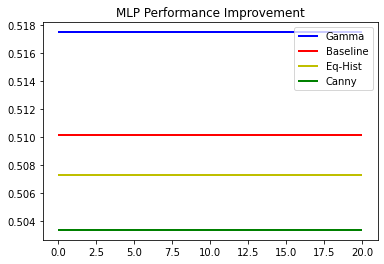

In [40]:
fig, ax = plt.subplots()
ax.hlines(y=accuracy_score(label_cc_test,prediction_gamma), xmin=0, xmax=20, linewidth=2, color='b')
ax.hlines(y=accuracy_score(label_cc_test,prediction), xmin=0, xmax=20, linewidth=2, color='r')
ax.hlines(y=accuracy_score(label_cc_test,prediction_exposure), xmin=0, xmax=20, linewidth=2, color='y')
ax.hlines(y=accuracy_score(label_cc_test,prediction_canny), xmin=0, xmax=20, linewidth=2, color='g')






plt.legend(['Gamma','Baseline','Eq-Hist','Canny'])
plt.title('MLP Performance Improvement')

plt.show()

> I excepected that the model is going to be improved as we have applied different features extraction methods, hence the model won't be confused by noisy pixels.
However, Some of the filters resulted in reducing accuracy and the one filter that has improved the model, improved it by 0.07 only.
It seems that we are encouraged to use different filters or a combinantion of filters, hence we may expect to have a more improved results.

# References

- [1] Stackoverflow Hints
- [2] Numpy Documentation
- [3] lecture labs
- [4] Sklearn